<a href="https://colab.research.google.com/github/SKShorna/Data_Science/blob/main/CIS%20640%3AFinal_Project_URL_Classification_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How many CPU cores are there?

In [ ]:
library(parallel)
detectCores(all.tests = FALSE, logical = TRUE)

[1] 4

## Try:1

## Installing libraries

In [ ]:
install.packages('caret')
install.packages('mlbench')
install.packages('ggplot2')
install.packages('readr')
install.packages('corrgram')
install.packages('lattice')
install.packages('FNN')
install.packages('pROC')

In [ ]:
library(caret)
library(mlbench)
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(corrgram) # Correlograms http://www.datavis.ca/papers/corrgram.pdf
library(lattice) #required for nearest neighbors
library(FNN) # nearest neighbors techniques
library(pROC) # to make ROC curve

In [ ]:
# Installing  more Packages 
install.packages("e1071")
install.packages("caTools")
install.packages("class")
install.packages('party')
install.packages('magrittr')
install.packages('tidyverse')
install.packages('dplyr')
  
# Loading package
library(e1071)
library(caTools)
library(class)
library(party)
library(magrittr)
library(tidyverse)
library(dplyr)

In [ ]:
install.packages('rpart')
install.packages('partykit')
install.packages('rpart.plot')

library(rpart)
library(partykit)
library(rpart.plot)

In [ ]:
url_data = read.csv('/content/urldata.csv') # read in the data in a dataframe
head(url_data) #show the first few rows of data

In [ ]:
url_data[303030:303050, ]

In [ ]:
tail(url_data, 200)

In [ ]:
str(url_data)

In [55]:
# number of row and column 
r <-nrow(url_data)
sprintf('Number of rows: %d', r)
c <-ncol(url_data)
sprintf('Number of columns: %d', c)

[1] "Number of rows: 450176"

[1] "Number of columns: 21"

In [76]:
table(url_data$label)


   benign malicious 
   345738    104438 

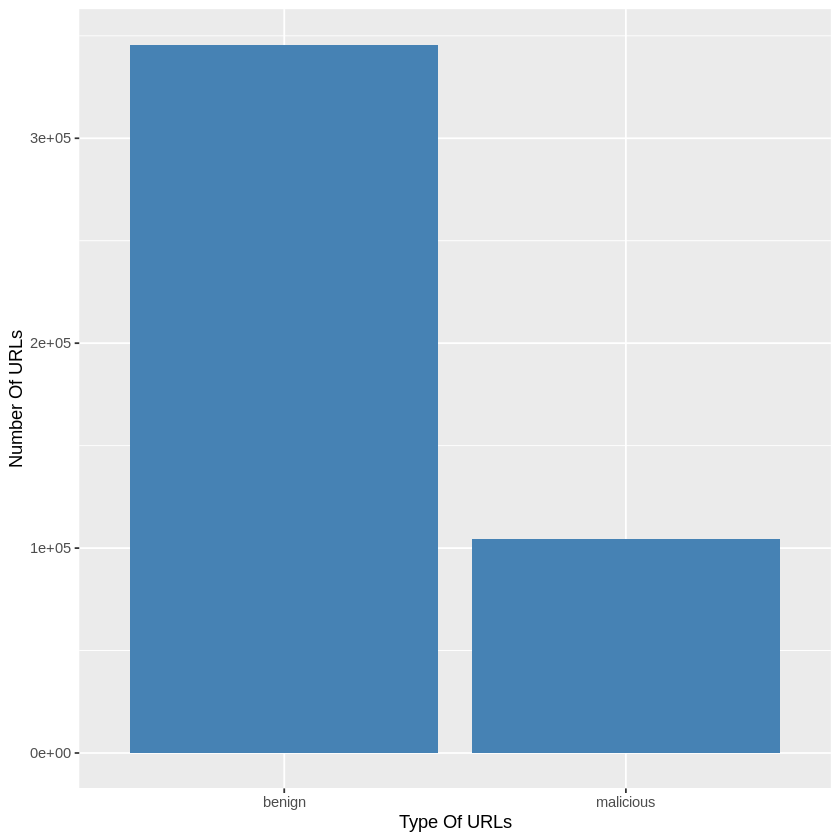

In [56]:
ggplot(url_data, aes(x=reorder(label, label, function(x)-length(x)))) +
  geom_bar(fill='steelblue') +
  labs(x='Type Of URLs') + labs(y='Number Of URLs')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



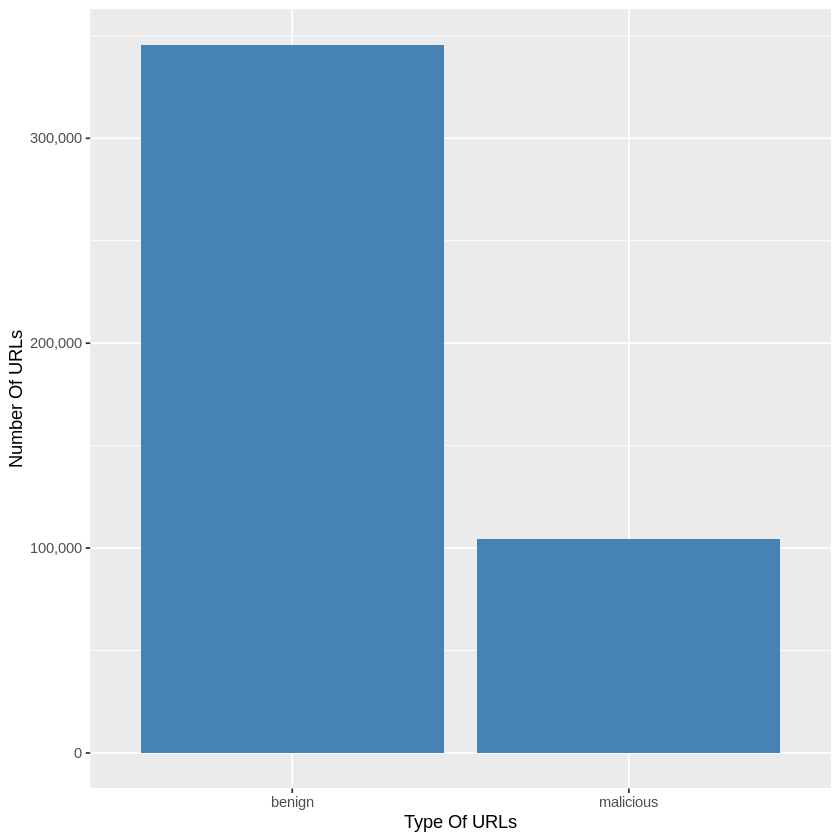

In [57]:
# change y axis scientific to normal

install.packages("scales")
library("scales")

ggp <- ggplot(url_data, aes(x=reorder(label, label, function(x)-length(x)))) +
  geom_bar(fill='steelblue') +
  labs(x='Type Of URLs') + labs(y='Number Of URLs')
ggp +                                      # Modify formatting of axis
  scale_y_continuous(labels = comma)

In [77]:
freq_ben = length(which(url_data$label == 'benign'))/ length(url_data$label)*100
print(paste("Percent Of Benign URLs:",freq_ben))

[1] "Percent Of Benign URLs: 76.8006290872903"


In [78]:
freq_mal = length(which(url_data$label == 'malicious'))/ length(url_data$label)*100
print(paste("Percent Of Malicious URLs:",freq_mal))

[1] "Percent Of Malicious URLs: 23.1993709127097"


In [58]:
# drop url and label column

url_data1 = subset(url_data, select = -c(url,label))
head(url_data1)
tail(url_data1)

,result,url_length,hostname_length,path_length,fd_length,count..1,count..2,count..3,count..4,count.,count..5,count.http,count.https,count.www,count.digits,count.letters,count_dir,use_of_ip,short_url
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
2,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
3,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
4,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
5,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1
6,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,-1


,result,url_length,hostname_length,path_length,fd_length,count..1,count..2,count..3,count..4,count.,count..5,count.http,count.https,count.www,count.digits,count.letters,count_dir,use_of_ip,short_url
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
450171,1,44,10,26,8,0,0,0,0,2,0,1,1,0,5,31,3,1,1
450172,1,43,11,25,8,1,0,0,0,2,0,1,0,0,0,34,3,1,-1
450173,1,159,13,139,2,0,0,0,0,2,1,1,0,0,21,118,12,1,1
450174,1,147,13,127,2,0,0,0,0,1,1,1,0,0,20,109,12,1,1
450175,1,22,14,1,0,0,0,0,0,1,0,1,0,0,0,17,1,1,1
450176,1,143,18,118,4,1,0,0,0,4,0,1,0,1,9,118,7,1,1


In [59]:
url_data1[1:19] <- lapply(url_data1[1:19], as.numeric)
head(url_data1)

,result,url_length,hostname_length,path_length,fd_length,count..1,count..2,count..3,count..4,count.,count..5,count.http,count.https,count.www,count.digits,count.letters,count_dir,use_of_ip,short_url
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
2,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
3,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
4,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
5,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1
6,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,-1


In [60]:
str(url_data1)

'data.frame':	450176 obs. of  19 variables:
 $ result         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ url_length     : num  22 23 24 21 25 22 21 24 18 22 ...
 $ hostname_length: num  14 15 16 13 17 14 13 16 10 14 ...
 $ path_length    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fd_length      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count..1       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count..2       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count..3       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count..4       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count.         : num  2 2 2 2 2 2 2 3 2 2 ...
 $ count..5       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count.http     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ count.https    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ count.www      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ count.digits   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count.letters  : num  17 18 19 16 20 17 16 18 13 17 ...
 $ count_dir      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ use_of_ip      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ short_url      : num  1 1 1 1 1 -1 1 1 1 

In [61]:
#summary(url_data$url_length)


In [62]:
# rename data column 
names(url_data1)[names(url_data1) == "count..1"] <- "count_dash"
names(url_data1)[names(url_data1) == "count..2"] <- "count_at"
names(url_data1)[names(url_data1) == "count..3"] <- "count_ques"
names(url_data1)[names(url_data1) == "count..4"] <- "count_percnt"
names(url_data1)[names(url_data1) == "count."] <- "count_dot"
names(url_data1)[names(url_data1) == "count..5"] <- "count_equal"
names(url_data1)[names(url_data1) == "count.http"] <- "count_http"
names(url_data1)[names(url_data1) == "count.https"] <- "count_https"
names(url_data1)[names(url_data1) == "count.digits"] <- "count_digits"
names(url_data1)[names(url_data1) == "count.letters"] <- "count_letters"

In [64]:
names(url_data1)[names(url_data1) == "count.www"] <- "count_www"

In [65]:
head(url_data1)

,result,url_length,hostname_length,path_length,fd_length,count_dash,count_at,count_ques,count_percnt,count_dot,count_equal,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip,short_url
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
2,0,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
3,0,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
4,0,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
5,0,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1
6,0,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,-1


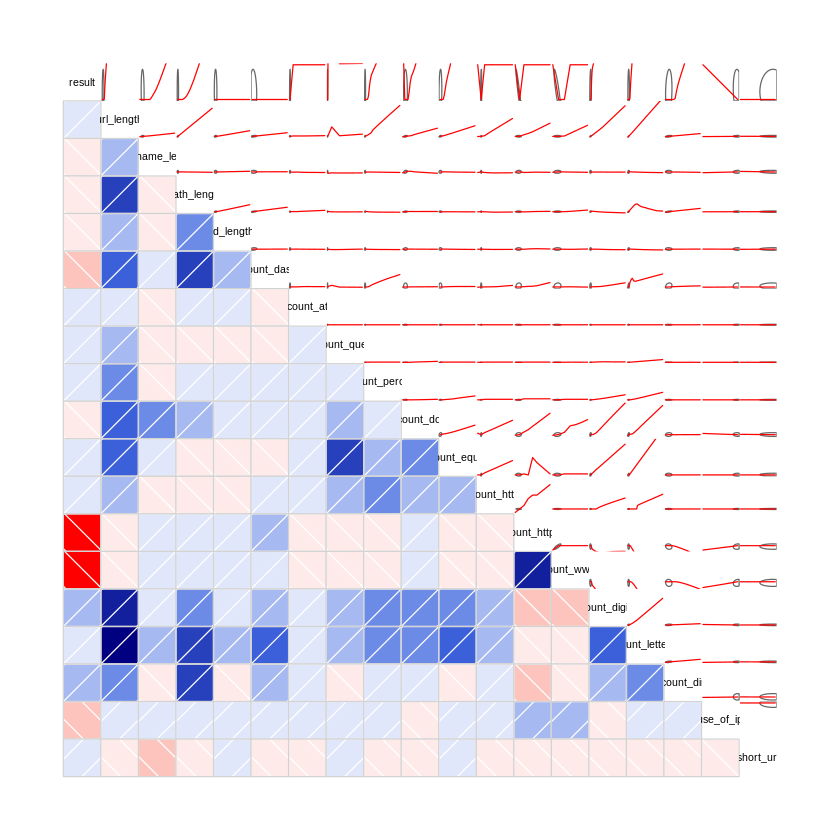

In [66]:
corrgram(url_data1, lower.panel=panel.shade, upper.panel=panel.ellipse)

In [70]:
# move result to last column
url_data1<- url_data1 %>%
    select(-one_of('result'), one_of('result'))

In [71]:
head(url_data1)

,url_length,hostname_length,path_length,fd_length,count_dash,count_at,count_ques,count_percnt,count_dot,count_equal,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip,short_url,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1,0
2,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1,0
3,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1,0
4,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1,0
5,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1,0
6,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,-1,0


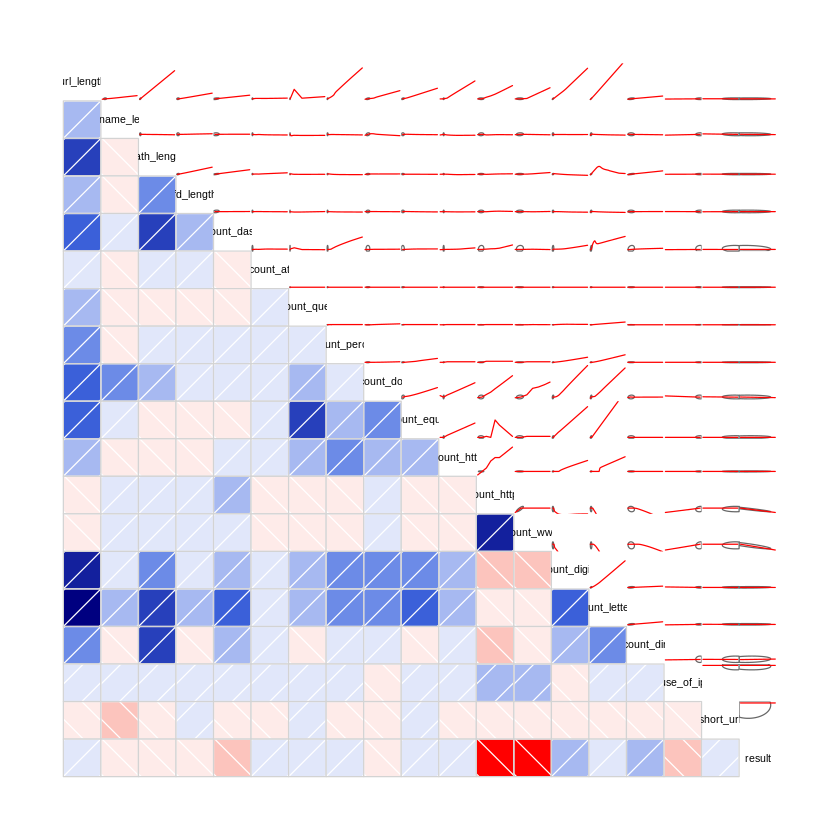

In [72]:
corrgram(url_data1, lower.panel=panel.shade, upper.panel=panel.ellipse)

## Do more data analysis

with one or more variables/predictors with target one

## Without normalization DT and NB start

## DT

In [79]:
set.seed(525)
head(url_data1)

,url_length,hostname_length,path_length,fd_length,count_dash,count_at,count_ques,count_percnt,count_dot,count_equal,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip,short_url,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1,0
2,23,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1,0
3,24,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1,0
4,21,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1,0
5,25,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1,0
6,22,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,-1,0


In [80]:
shuffle_index <- sample(1:nrow(url_data1))
head(shuffle_index)

[1] 380598 302455 251506 367551 416804  46296

In [81]:
url_data1 <-url_data1[shuffle_index, ]
head(url_data1)

,url_length,hostname_length,path_length,fd_length,count_dash,count_at,count_ques,count_percnt,count_dot,count_equal,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip,short_url,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
380598,43,18,18,4,0,0,0,0,3,0,1,0,0,4,31,2,1,1,1
302455,79,31,10,9,0,0,1,0,3,2,1,1,1,8,60,1,1,1,0
251506,52,20,24,5,1,0,0,0,2,0,1,1,1,5,38,3,1,-1,0
367551,63,18,38,7,0,0,0,0,3,0,1,0,0,0,52,5,1,1,1
416804,40,18,15,14,1,0,0,0,3,0,1,0,0,19,12,1,1,1,1
46296,54,17,29,1,2,0,0,0,3,0,1,1,1,0,44,2,1,-1,0


In [82]:
table(url_data1$result) # 0 --> benign and 1--> malicious


     0      1 
345738 104438 

In [85]:
set.seed(525)
sample_data = sample.split(url_data1, SplitRatio = 0.75)
train_data <- subset(url_data1, sample_data == TRUE)
test_data <- subset(url_data1, sample_data == FALSE)

In [ ]:
# rtree <- rpart(result ~ ., train_data)
# rpart.plot(rtree)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



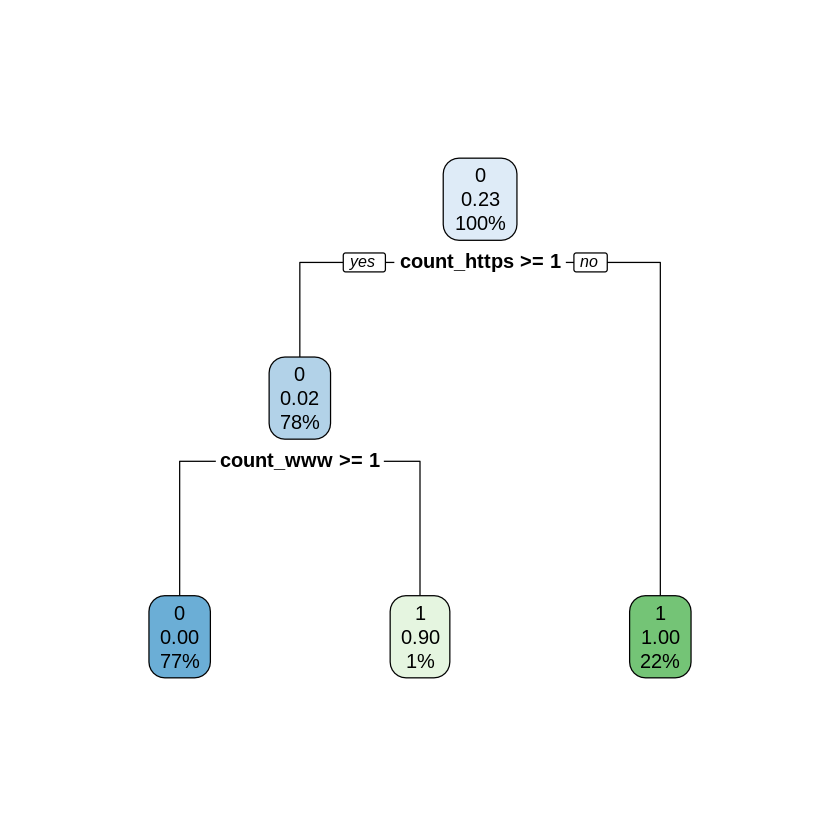

In [87]:
install.packages('rpart.plot')
library(rpart)
library(rpart.plot)
fit <- rpart(result~., data = train_data, method = 'class')
rpart.plot(fit, extra = 106)

In [88]:
predict_unseen <-predict(fit, test_data, type = 'class')

In [89]:
table_url <- table(test_data$result, predict_unseen)
table_url

   predict_unseen
        0     1
  0 90637   178
  1   357 27296

In [90]:
accuracy_Test <- sum(diag(table_url)) / sum(table_url)
print(paste('Accuracy for test', accuracy_Test))

[1] "Accuracy for test 0.995484012560354"


In [103]:
# Model Evaluation
confusionMatrix(table_url)

Confusion Matrix and Statistics

   predict_unseen
        0     1
  0 90637   178
  1   357 27296
                                          
               Accuracy : 0.9955          
                 95% CI : (0.9951, 0.9959)
    No Information Rate : 0.7681          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9874          
                                          
 Mcnemar's Test P-Value : 1.408e-14       
                                          
            Sensitivity : 0.9961          
            Specificity : 0.9935          
         Pos Pred Value : 0.9980          
         Neg Pred Value : 0.9871          
             Prevalence : 0.7681          
         Detection Rate : 0.7651          
   Detection Prevalence : 0.7666          
      Balanced Accuracy : 0.9948          
                                          
       'Positive' Class : 0               
                                         

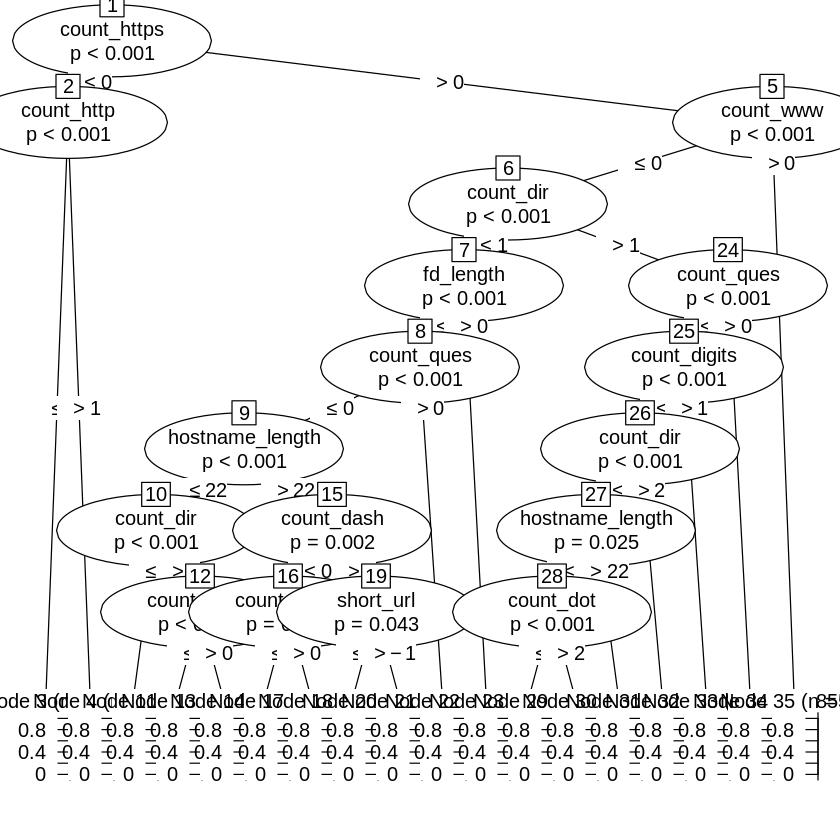

In [91]:
ctree_ <- ctree(result ~ ., train_data)
plot(ctree_)

## NB

In [98]:
fit_nb <- naiveBayes(result ~ ., data = train_data, method = 'class')
fit_nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, method = "class")

A-priori probabilities:
Y
        0         1 
0.7685163 0.2314837 

Conditional probabilities:
   url_length
Y       [,1]     [,2]
  0 58.46890 25.51505
  1 66.13731 62.19035

   hostname_length
Y       [,1]     [,2]
  0 19.60534 5.847321
  1 18.24183 8.931864

   path_length
Y       [,1]     [,2]
  0 27.59753 23.62486
  1 26.95461 28.22238

   fd_length
Y       [,1]      [,2]
  0 8.342088 10.617605
  1 7.521430  8.612406

   count_dash
Y        [,1]     [,2]
  0 1.4656308 2.818206
  1 0.5575177 1.329760

   count_at
Y           [,1]       [,2]
  0 0.0006786363 0.02943588
  1 0.0280393306 0.19193439

   count_ques
Y        [,1]      [,2]
  0 0.1331971 0.3469400
  1 0.2163964 0.5205753

   count_percnt
Y         [,1]      [,2]
  0 0.07359085 0.7427571
  1 0.14745067 2.0106528

   count_dot
Y       [,1]      [,2]
  0 2.651463 0.7696618
  1 2.521156 1.9312384

   

In [121]:
# y_pred <- predict(classifier_cl, newdata = test_data, type= 'class')


In [99]:
predict_unseen_nb <-predict(fit_nb, test_data, type = 'class')

In [100]:
table_url_nb <- table(test_data$result, predict_unseen_nb)
table_url_nb

   predict_unseen_nb
        0     1
  0 89968   847
  1  3338 24315

In [101]:
accuracy_Test_nb <- sum(diag(table_url_nb)) / sum(table_url_nb)
print(paste('Accuracy for test NB', accuracy_Test_nb))

[1] "Accuracy for test NB 0.964674004794544"


In [102]:
# Model Evaluation
confusionMatrix(table_url_nb)

Confusion Matrix and Statistics

   predict_unseen_nb
        0     1
  0 89968   847
  1  3338 24315
                                          
               Accuracy : 0.9647          
                 95% CI : (0.9636, 0.9657)
    No Information Rate : 0.7876          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8981          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9642          
            Specificity : 0.9663          
         Pos Pred Value : 0.9907          
         Neg Pred Value : 0.8793          
             Prevalence : 0.7876          
         Detection Rate : 0.7594          
   Detection Prevalence : 0.7666          
      Balanced Accuracy : 0.9653          
                                          
       'Positive' Class : 0               
                                      

## Without normalization DT and NB end

## With normalization Start

DT, NB

## DT

In [108]:
head (url_data1)

,url_length,hostname_length,path_length,fd_length,count_dash,count_at,count_ques,count_percnt,count_dot,count_equal,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip,short_url,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
380598,43,18,18,4,0,0,0,0,3,0,1,0,0,4,31,2,1,1,1
302455,79,31,10,9,0,0,1,0,3,2,1,1,1,8,60,1,1,1,0
251506,52,20,24,5,1,0,0,0,2,0,1,1,1,5,38,3,1,-1,0
367551,63,18,38,7,0,0,0,0,3,0,1,0,0,0,52,5,1,1,1
416804,40,18,15,14,1,0,0,0,3,0,1,0,0,19,12,1,1,1,1
46296,54,17,29,1,2,0,0,0,3,0,1,1,1,0,44,2,1,-1,0


In [110]:
str(url_data1)

'data.frame':	450176 obs. of  19 variables:
 $ url_length     : num  43 79 52 63 40 54 61 104 37 82 ...
 $ hostname_length: num  18 31 20 18 18 17 20 24 28 17 ...
 $ path_length    : num  18 10 24 38 15 29 33 72 1 57 ...
 $ fd_length      : num  4 9 5 7 14 1 9 4 0 19 ...
 $ count_dash     : num  0 0 1 0 1 2 1 8 0 9 ...
 $ count_at       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count_ques     : num  0 1 0 0 0 0 0 0 0 0 ...
 $ count_percnt   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ count_dot      : num  3 3 2 3 3 3 3 2 4 2 ...
 $ count_equal    : num  0 2 0 0 0 0 0 0 0 0 ...
 $ count_http     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ count_https    : num  0 1 1 0 0 1 1 1 1 1 ...
 $ count_www      : num  0 1 1 0 0 1 1 1 1 1 ...
 $ count_digits   : num  4 8 5 0 19 0 0 15 0 4 ...
 $ count_letters  : num  31 60 38 52 12 44 51 71 29 61 ...
 $ count_dir      : num  2 1 3 5 1 2 2 5 1 3 ...
 $ use_of_ip      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ short_url      : num  1 1 -1 1 1 -1 1 1 1 1 ...
 $ result         : num  1 0

In [109]:
#Normalization
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

In [111]:
url_data1_n <- as.data.frame(lapply(url_data1[,1:18], normalize))

In [112]:
# data splitting

set.seed(525)
url_data1_d <- sample(1:nrow(url_data1_n),size=nrow(url_data1_n)*0.7,replace = FALSE) #random selection of 70% data.
 
train_data <- url_data1[url_data1_d,] # 70% training data
test_data <- url_data1[-url_data1_d,] # remaining 30% test data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



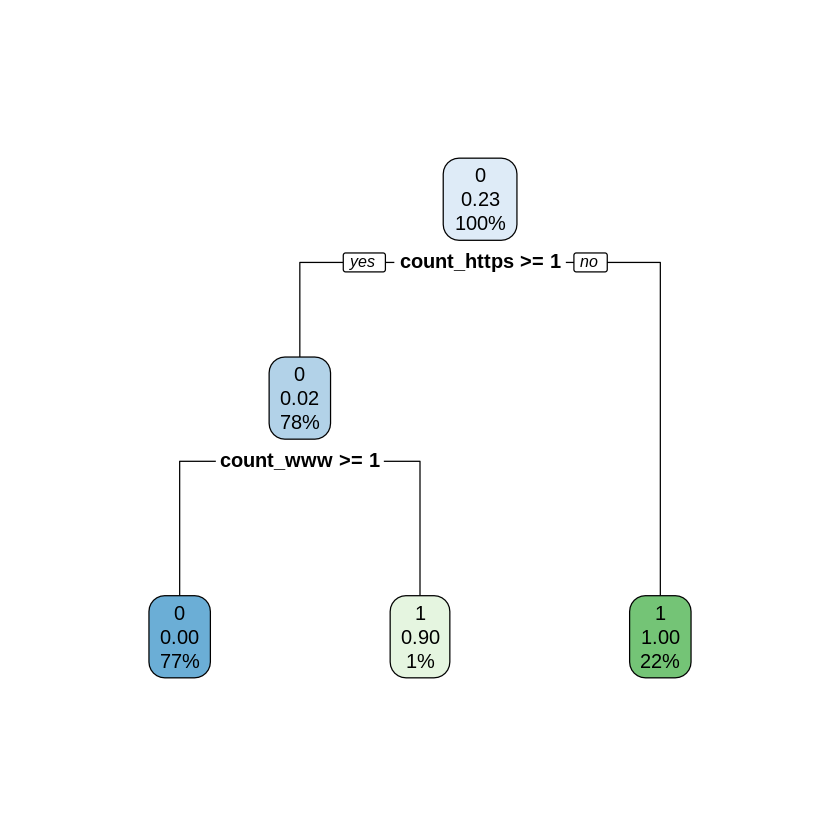

In [113]:
install.packages('rpart.plot')
library(rpart)
library(rpart.plot)
fit <- rpart(result~., data = train_data, method = 'class')
rpart.plot(fit, extra = 106)

In [114]:
predict_unseen <-predict(fit, test_data, type = 'class')

In [115]:
table_url <- table(test_data$result, predict_unseen)
table_url

   predict_unseen
         0      1
  0 103543    213
  1    400  30897

In [116]:
accuracy_Test <- sum(diag(table_url)) / sum(table_url)
print(paste('Accuracy for test', accuracy_Test))

[1] "Accuracy for test 0.995461041220854"


In [117]:
# Model Evaluation
confusionMatrix(table_url)

Confusion Matrix and Statistics

   predict_unseen
         0      1
  0 103543    213
  1    400  30897
                                          
               Accuracy : 0.9955          
                 95% CI : (0.9951, 0.9958)
    No Information Rate : 0.7696          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9872          
                                          
 Mcnemar's Test P-Value : 5.802e-14       
                                          
            Sensitivity : 0.9962          
            Specificity : 0.9932          
         Pos Pred Value : 0.9979          
         Neg Pred Value : 0.9872          
             Prevalence : 0.7696          
         Detection Rate : 0.7667          
   Detection Prevalence : 0.7683          
      Balanced Accuracy : 0.9947          
                                          
       'Positive' Class : 0               
                                   

## NB

In [119]:
# data splitting

set.seed(525)
url_data1_d <- sample(1:nrow(url_data1_n),size=nrow(url_data1_n)*0.7,replace = FALSE) #random selection of 70% data.
 
train_data_nb <- url_data1[url_data1_d,] # 70% training data
test_data_nb <- url_data1[-url_data1_d,] # remaining 30% test data

In [120]:
fit_nb <- naiveBayes(result ~ ., data = train_data_nb, method = 'class')
fit_nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, method = "class")

A-priori probabilities:
Y
       0        1 
0.767897 0.232103 

Conditional probabilities:
   url_length
Y       [,1]     [,2]
  0 58.45305 25.56487
  1 66.07985 62.29795

   hostname_length
Y       [,1]     [,2]
  0 19.61694 5.857005
  1 18.23593 8.840399

   path_length
Y       [,1]     [,2]
  0 27.54485 23.56054
  1 26.96951 28.22351

   fd_length
Y       [,1]      [,2]
  0 8.300977 10.521953
  1 7.517275  8.693487

   count_dash
Y        [,1]     [,2]
  0 1.4576291 2.800522
  1 0.5560356 1.320386

   count_at
Y          [,1]       [,2]
  0 0.000582688 0.02838149
  1 0.028711667 0.19725022

   count_ques
Y        [,1]      [,2]
  0 0.1335719 0.3471072
  1 0.2191794 0.8058385

   count_percnt
Y         [,1]      [,2]
  0 0.07322032 0.7711052
  1 0.14519900 2.0365742

   count_dot
Y       [,1]      [,2]
  0 2.651991 0.7743588
  1 2.514581 1.9144675

   count_e

In [123]:
predict_unseen_nb <-predict(fit_nb, test_data_nb, type = 'class')

In [124]:
table_url_nb <- table(test_data_nb$result, predict_unseen_nb)
table_url_nb



   predict_unseen_nb
         0      1
  0 102789    967
  1   3903  27394

In [125]:
accuracy_Test_nb <- sum(diag(table_url_nb)) / sum(table_url_nb)
print(paste('Accuracy for test NB', accuracy_Test_nb))



[1] "Accuracy for test NB 0.963940082782315"


In [126]:
# Model Evaluation
confusionMatrix(table_url_nb)

Confusion Matrix and Statistics

   predict_unseen_nb
         0      1
  0 102789    967
  1   3903  27394
                                          
               Accuracy : 0.9639          
                 95% CI : (0.9629, 0.9649)
    No Information Rate : 0.79            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8953          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9634          
            Specificity : 0.9659          
         Pos Pred Value : 0.9907          
         Neg Pred Value : 0.8753          
             Prevalence : 0.7900          
         Detection Rate : 0.7611          
   Detection Prevalence : 0.7683          
      Balanced Accuracy : 0.9647          
                                          
       'Positive' Class : 0               
                                

## With normalization DT and NB end

## KNN with normalization start

## KNN with normalization end

## Extra part start

## Without  KNN start

In [104]:
url_data1_knn <- url_data1

In [105]:
head(url_data1_knn)

,url_length,hostname_length,path_length,fd_length,count_dash,count_at,count_ques,count_percnt,count_dot,count_equal,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip,short_url,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
380598,43,18,18,4,0,0,0,0,3,0,1,0,0,4,31,2,1,1,1
302455,79,31,10,9,0,0,1,0,3,2,1,1,1,8,60,1,1,1,0
251506,52,20,24,5,1,0,0,0,2,0,1,1,1,5,38,3,1,-1,0
367551,63,18,38,7,0,0,0,0,3,0,1,0,0,0,52,5,1,1,1
416804,40,18,15,14,1,0,0,0,3,0,1,0,0,19,12,1,1,1,1
46296,54,17,29,1,2,0,0,0,3,0,1,1,1,0,44,2,1,-1,0


In [106]:
set.seed(525)
sample_data = sample.split(url_data1_knn, SplitRatio = 0.75)
train_data <- subset(url_data1_knn, sample_data == TRUE)
test_data <- subset(url_data1_knn, sample_data == FALSE)

In [107]:
NROW(train_data)

[1] 331708

In [ ]:
knn.3 <-  knn(train=train.url_data_knn1,  test=test_data,  cl=train_data, k=3)

In [ ]:
# #Feature/Attribute selection

# #The variable 'Creditability' is our target variable i.e. this variable will determine whether bank manager will approve a loan based on the 7 Attributes.

# url_data_knn.subset <- url_data_knn[c('Creditability','Age..years.','Sex...Marital.Status','Occupation','Account.Balance','Credit.Amount','Length.of.current.employment','Purpose')]
# head(gc.subset)

In [ ]:
#Data normalistion to avoid biasness as the value sclae of 'Credit.Amount'is in thousand whereas other attribute's value are in 2 digits or 1 digit.

normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) } # creating a normalize function for easy convertion.
url_data_knn1.n<- as.data.frame(lapply(url_data_knn1[,2:9], normalize)) # lapply creates list that is why it is converted to dataframe and it applies defined fundtion (which is 'normalize') to all the list values which is here column 2 to 8 as first column is target/response.
head(url_data_knn1.n)

,url_length,hostname_length,fd_length,count..1,count.,count..5,count.http,count.www
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.006071119,0.05833333,0,0,0.0625,0,0.1,0.1666667
2,0.006504770,0.06250000,0,0,0.0625,0,0.1,0.1666667
3,0.006938422,0.06666667,0,0,0.0625,0,0.1,0.1666667
4,0.005637467,0.05416667,0,0,0.0625,0,0.1,0.1666667
5,0.007372073,0.07083333,0,0,0.0625,0,0.1,0.1666667
6,0.006071119,0.05833333,0,0,0.0625,0,0.1,0.1666667


In [ ]:
url_data_knn1_x<- as.data.frame(url_data_knn1[,2:9]) # lapply creates list that is why it is converted to dataframe and it applies defined fundtion (which is 'normalize') to all the list values which is here column 2 to 8 as first column is target/response.
head(url_data_knn1_x)

,url_length,hostname_length,fd_length,count..1,count.,count..5,count.http,count.www
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,22,14,0,0,2,0,1,1
2,23,15,0,0,2,0,1,1
3,24,16,0,0,2,0,1,1
4,21,13,0,0,2,0,1,1
5,25,17,0,0,2,0,1,1
6,22,14,0,0,2,0,1,1


In [ ]:
#Now all attributes having value in the range 0 to 1 which is normalised data and 'Creditability' column has been removed as sample value starts form column 2.

#Creating Training and Test data set. Training data will be used to build model whereas test data will be used for validation and optimisation of model by tuning k value.

set.seed(123)  # To get the same random sample
dat.d <- sample(1:nrow(url_data_knn1),size=nrow(url_data_knn1)*0.7,replace = FALSE) #random selection of 70% data.

train.url_data_knn1 <- url_data_knn1[dat.d,] # 70% training data
test.url_data_knn1 <- url_data_knn1[-dat.d,] # remaining 30% test data

#Now creating seperate dataframe for 'Creditability' feature which is our target.
train.url_data_knn1_labels <- url_data_knn1[dat.d,1]
test.url_data_knn1_labels  <- url_data_knn1[-dat.d,1]   

In [ ]:
#install.packages(class) # to install class packages as it carries kNN function
library(class)          # to call class package

NROW(train.url_data_knn1_labels)   # to find the number of observation

[1] 315123

In [ ]:
#To identify optimum value of k, generally square root of total no of observations (700) which is 26.45 is taken, so will try with 26, 27 then will check for optimal value of k.

knn.2 <-  knn(train=train.url_data_knn1,  test=test.url_data_knn1,  cl=train.url_data_knn1_labels, k=2)
#knn.6 <-  knn(train=train.url_data_knn1, test=test.url_data_knn1, cl=train.url_data_knn1_labels, k=27)

ERROR: ignored

## Linear model

## try 1: All variable from url_data_new

In [ ]:
linear_result = lm(result ~ hostname_length+path_length+fd_length+count..1+count..2+
count..3+count..4+count.+count..5+count.http+count.https+count.www+count.digits+count.letters+count_dir+use_of_ip, data= url_data)
summary(linear_result)


Call:
lm(formula = result ~ hostname_length + path_length + fd_length + 
    count..1 + count..2 + count..3 + count..4 + count. + count..5 + 
    count.http + count.https + count.www + count.digits + count.letters + 
    count_dir + use_of_ip, data = url_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6056 -0.0244 -0.0164 -0.0090  3.5311 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      6.713e-01  2.152e-03  311.889  < 2e-16 ***
hostname_length  6.366e-04  2.859e-05   22.267  < 2e-16 ***
path_length     -1.993e-05  1.512e-05   -1.318 0.187588    
fd_length        7.874e-05  1.858e-05    4.239 2.25e-05 ***
count..1        -2.955e-03  8.918e-05  -33.133  < 2e-16 ***
count..2         2.840e-02  1.737e-03   16.346  < 2e-16 ***
count..3         1.488e-03  4.377e-04    3.400 0.000675 ***
count..4        -4.974e-03  1.684e-04  -29.532  < 2e-16 ***
count.           1.741e-03  1.784e-04    9.759  < 2e-16 ***
count..5         3.794e-04  2

In [ ]:
linear_result = lm(result ~ hostname_length+path_length+fd_length+count..1+count..2+
count..3+count..4+count.+count..5+count.http+count.https+count.www+count.digits+count.letters+count_dir+use_of_ip, data= url_data_new)
summary(linear_result)


Call:
lm(formula = result ~ hostname_length + path_length + fd_length + 
    count..1 + count..2 + count..3 + count..4 + count. + count..5 + 
    count.http + count.https + count.www + count.digits + count.letters + 
    count_dir + use_of_ip, data = url_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6056 -0.0244 -0.0164 -0.0090  3.5311 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      6.713e-01  2.152e-03  311.889  < 2e-16 ***
hostname_length  6.366e-04  2.859e-05   22.267  < 2e-16 ***
path_length     -1.993e-05  1.512e-05   -1.318 0.187588    
fd_length        7.874e-05  1.858e-05    4.239 2.25e-05 ***
count..1        -2.955e-03  8.918e-05  -33.133  < 2e-16 ***
count..2         2.840e-02  1.737e-03   16.346  < 2e-16 ***
count..3         1.488e-03  4.377e-04    3.400 0.000675 ***
count..4        -4.974e-03  1.684e-04  -29.532  < 2e-16 ***
count.           1.741e-03  1.784e-04    9.759  < 2e-16 ***
count..5         3.794e-0

## Try 2: Single-variable linear regression

In [ ]:
linear_result_1 = lm(result ~ count..5, data = url_data_new)
summary(linear_result_1)


Call:
lm(formula = result ~ count..5, data = url_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7609 -0.2203 -0.2203 -0.2203  0.7797 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.2203015  0.0006508  338.53   <2e-16 ***
count..5    0.0453109  0.0006877   65.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4201 on 450174 degrees of freedom
Multiple R-squared:  0.009551,	Adjusted R-squared:  0.009549 
F-statistic:  4341 on 1 and 450174 DF,  p-value: < 2.2e-16


In [ ]:
linear_result_1_n = lm(result ~ count.www, data = url_data_new)
summary(linear_result_1_n)


Call:
lm(formula = result ~ count.www, data = url_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9806 -0.0491 -0.0491 -0.0491  4.6087 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.9806336  0.0006529    1502   <2e-16 ***
count.www   -0.9315624  0.0007269   -1282   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1958 on 450174 degrees of freedom
Multiple R-squared:  0.7849,	Adjusted R-squared:  0.7849 
F-statistic: 1.643e+06 on 1 and 450174 DF,  p-value: < 2.2e-16


## Try 3:  Four-variable linear regression regression

In [ ]:
linear_result_2 = lm(result ~ hostname_length+fd_length+count.www+count.letters, data = url_data_new)
summary(linear_result_2)


Call:
lm(formula = result ~ hostname_length + fd_length + count.www + 
    count.letters, data = url_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3997 -0.0512 -0.0413 -0.0319  4.5593 

Coefficients:
                  Estimate Std. Error   t value Pr(>|t|)    
(Intercept)      9.485e-01  1.082e-03   876.861   <2e-16 ***
hostname_length -4.386e-05  4.460e-05    -0.983    0.325    
fd_length       -4.705e-04  2.940e-05   -16.003   <2e-16 ***
count.www       -9.307e-01  7.282e-04 -1278.007   <2e-16 ***
count.letters    7.941e-04  1.125e-05    70.600   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1947 on 450171 degrees of freedom
Multiple R-squared:  0.7873,	Adjusted R-squared:  0.7873 
F-statistic: 4.167e+05 on 4 and 450171 DF,  p-value: < 2.2e-16


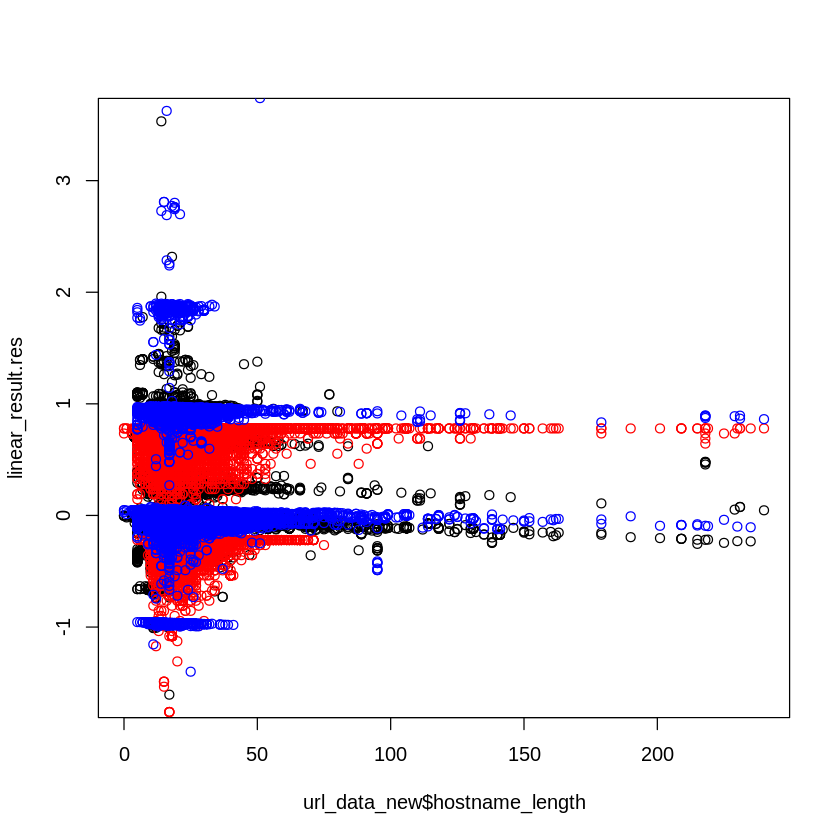

In [ ]:
linear_result.res = resid(linear_result) # gets residuals
linear_result_1.res = resid(linear_result_1)
linear_result_2.res = resid(linear_result_2)

plot(url_data_new$hostname_length, linear_result.res) # plot residuals against alcohol variable
points(url_data_new$hostname_length, linear_result_1.res, col="red") # add the residuals for 1-dimension
points(url_data_new$hostname_length, linear_result_2.res, col="blue") # add residuals for 4 dimension

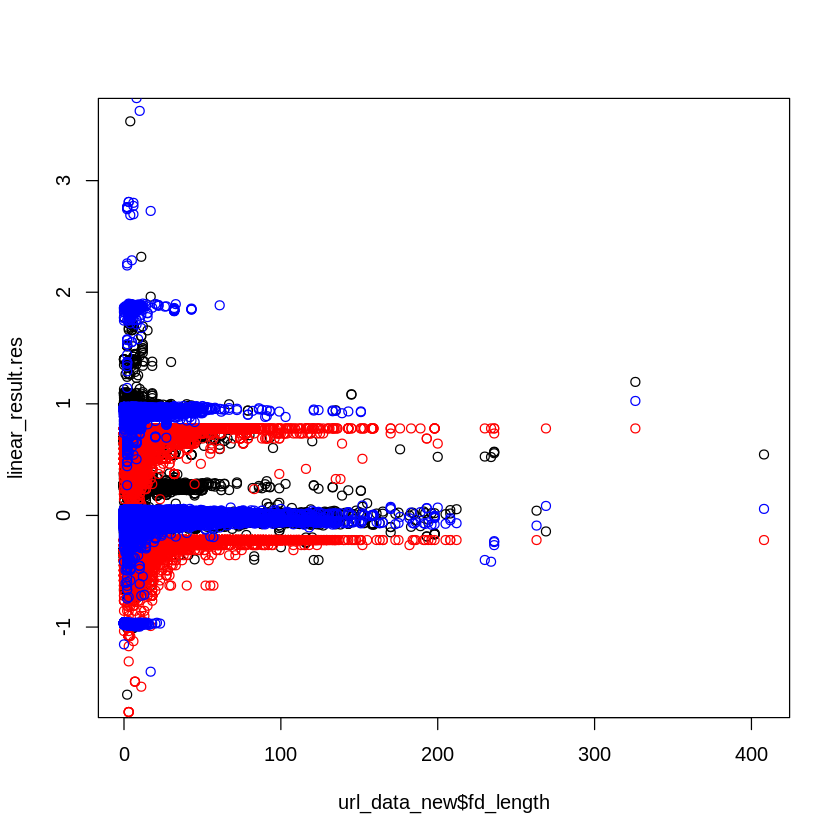

In [ ]:
linear_result.res = resid(linear_result) # gets residuals
linear_result_1.res = resid(linear_result_1)
linear_result_2.res = resid(linear_result_2)

plot(url_data_new$fd_length, linear_result.res) # plot residuals against alcohol variable
points(url_data_new$fd_length, linear_result_1.res, col="red") # add the residuals for 1-dimension
points(url_data_new$fd_length, linear_result_2.res, col="blue") # add residuals for 4 dimension

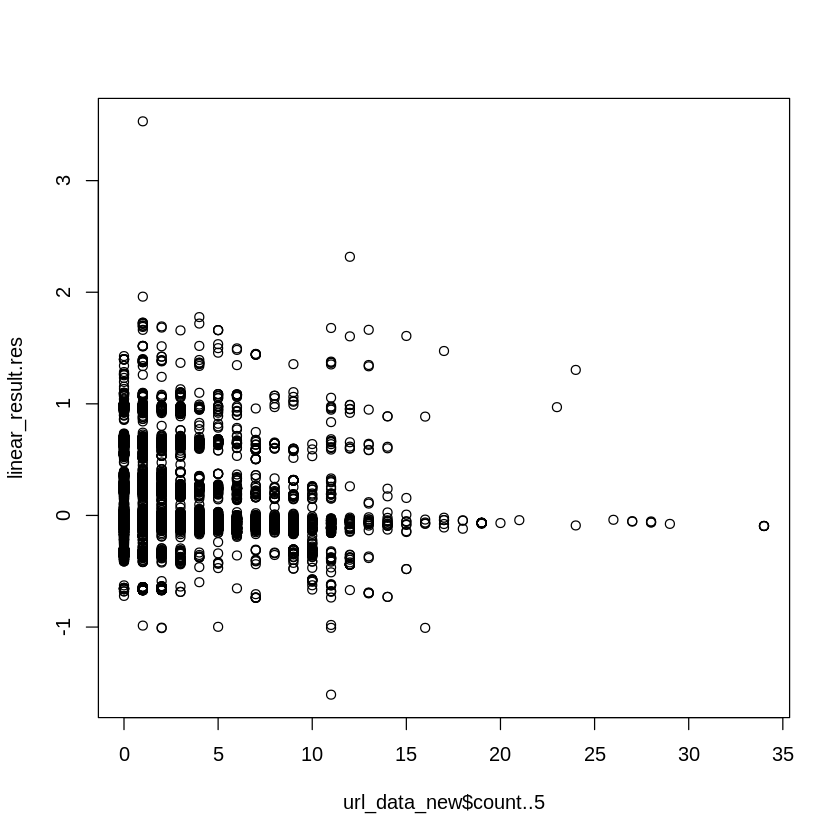

In [ ]:
linear_result.res = resid(linear_result) # gets residuals
linear_result_1.res = resid(linear_result_1)
linear_result_2.res = resid(linear_result_2)

plot(url_data_new$count..5, linear_result.res) # plot residuals against alcohol variable
#points(url_data_new$count..5, linear_result_1.res, col="red") # add the residuals for 1-dimension
points(url_data_new$count..5, linear_result_2.res, col="blue") # add residuals for 4 dimension

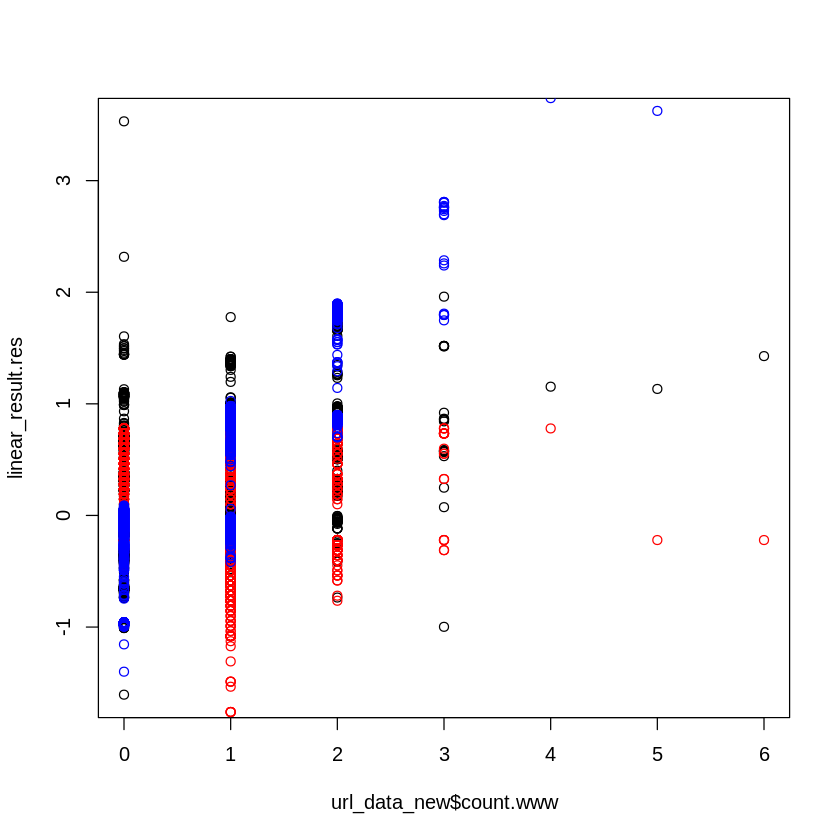

In [ ]:
linear_result.res = resid(linear_result) # gets residuals
linear_result_1.res = resid(linear_result_1)
linear_result_2.res = resid(linear_result_2)

plot(url_data_new$count.www, linear_result.res) # plot residuals against alcohol variable
points(url_data_new$count.www, linear_result_1.res, col="red") # add the residuals for 1-dimension
points(url_data_new$count.www, linear_result_2.res, col="blue") # add residuals for 4 dimension

## Extra part end